# 활성화 함수( Activation Function )
* 인공 신경망의 퍼셉트론을 **유닛, 노드, 뉴런**이라고 표현
  * 어떤 입력($x$)가 유닛, 노드, 뉴런으로 입력되 면 각각의 출력을 낸다.
* **퍼셉트론**이란 뉴런은 결과물로써 0과 1을 낸다.
  * $z=w_1x_1+w_2x_2+b$의 결과를 0과 1로 낸다.
* 활성화 함수란?
  * $WX+b$의 결과물을 결정하기 위한 함수

# 뉴런이 값을 다양하게 표현(출력)한다는 것의 의미
**비선형 활성화 함수를 사용**
* 왜 선형 함수는 사용하지 않는가.
  * 활성화 함수가 $a(z)$ = $cz_{(c는 상수)}$
  * 층을 여러 개(3개) 쌓았을 때의 결과물 $y=a(a(a(z)))$
  * 이는 $y=c^3z$
  * 여러 층을 쌓아도 단순하게 상수값에 $z$를 곱한 형식으로 표현이 된다.
  * 뉴런을 겹겹이 쌓는 의미가 사라진다.
* 비선형 함수를 사용하게 되면?
  * 값의 표현이 단순하게 표현되지 않는다.
  * 층을 쌓거나, 다른 활성화 함수를 사용했을 때 뉴런의 표현(뉴런의 출력)이 다채롭게 된다.

# 활성화 함수 #1 시그모이드($\sigma$)
* 제일 유명한 활성화 함수
* $
\sigma(z) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-z} }
$, $z=WX+b$
* 어떠한 값이 들어오든 항상 **0보다 크고 1보다 작은 실수**를 출력

**시그모이드가 의미하는 것**
* 연산에서는 입력 신호의 강도(세기)를 의미 - 히든 레이어 에서의 시그모이드
  * 다음 층에 얼마나 강하게 값을 넘길 것인지를 결정
    * 계단 함수는 활성화가 된다(1), 안된다(0)
  * 시그모이드 함수는 **이 만큼 강하게 활성화가 된다(1에 가까운 실수)**, **이 만큼 약하게 활성화가 된다(0에 가까운 실수)**
* 출력 과정( 신경망의 결정에서의 의미 )에서는 0 또는 1이 될 **확률**을 의미한다. - 출력층 에서의 시그모이드
  * 0.5를 기준으로 0.5보다 작으면 0으로 분류될 확률이 크다.
  * 0.5를 기준으로 0.5보다 크면 1로 분류될 확률이 크다.
  * **1로 분류될 확률이 시그모이드의 결과**
    * 예시 : $\sigma(z)=0.4$라면?
      * 1로 분류될 확률이 40%
      * 0으로 분류될 확률이 60%

In [1]:
import numpy as np

# 계단 함수 구현하기
def step_function(x):
  return np.array(x > 0, dtype=np.int32)

# 시그모이드 함수 구현하기
# 자연상수 e의 지수함수는 numpy의 exp에 구현되어 있다.
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# 시그모이드의 도함수
def sigmoid_derivative(x):
  sig = 1 / (1 + np.exp(-x))
  return sig * (1 - sig)

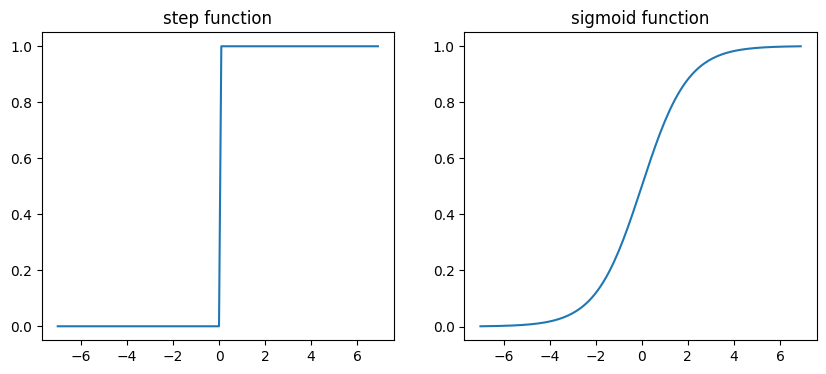

In [2]:
import matplotlib.pyplot as plt

x = np.arange(-7.0, 7.0, 0.1)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))

ax1.plot(x, step_function(x))
ax1.set_title('step function')

ax2.plot(x, sigmoid(x))
ax2.set_title('sigmoid function')

plt.show()

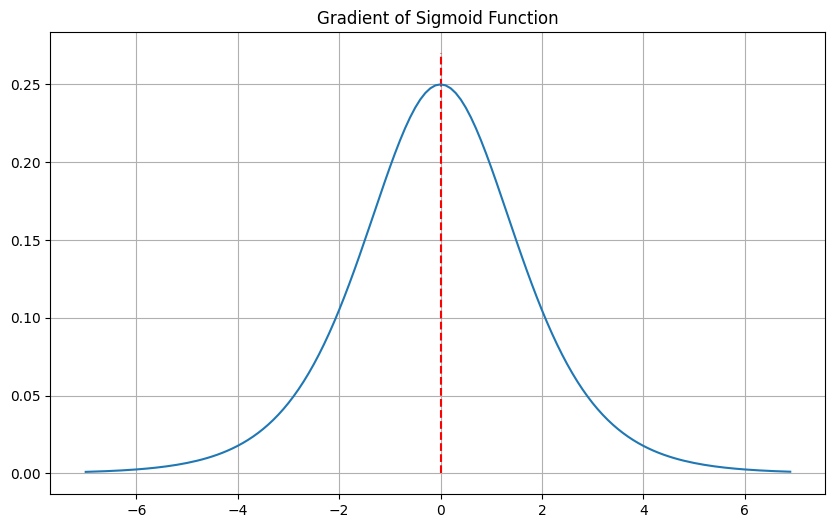

In [3]:
x = np.arange(-7.0, 7.0, 0.1)
plt.figure(figsize=(10, 6))

plt.grid()
plt.title('Gradient of Sigmoid Function')
plt.vlines(0, 0, 0.27, linestyle='--', colors='r')
plt.plot(x, sigmoid_derivative(x))
plt.show()

# 활성화 함수 # 2 ReLU(Rectified Linear Unit)
* 이미지 처리에 주로 사용되는 함수
  * 요즘엔 다양한 분야에 활용 되는 중
* CNN과 찰떡궁합인 함수
* 입력값이 0을 넘으면 그대로 출력, 0 이하면 0을 출력하는 함수
* $a(x) = \begin{cases}
0\enspace(x \leq 0)
\\ x\enspace(x > 0) \end{cases}$


In [4]:
def relu(x):
  return np.maximum(0, x)

relu(-5), relu(5)

(np.int64(0), np.int64(5))

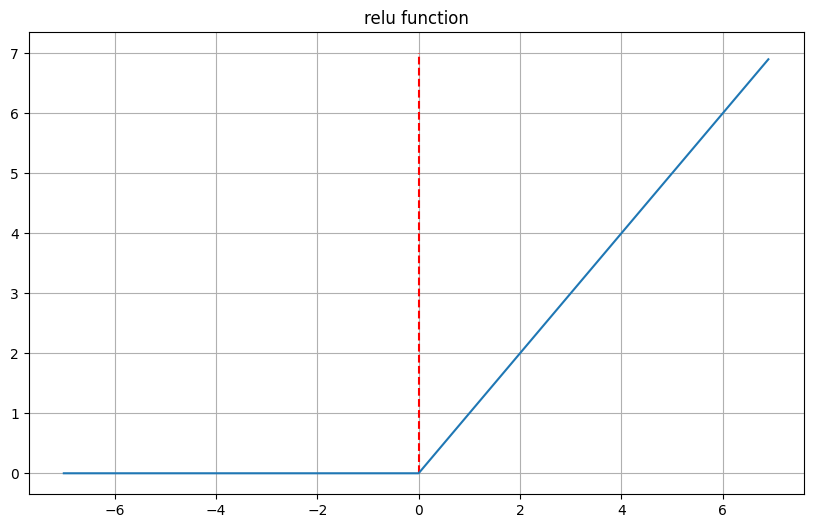

In [5]:
x = np.arange(-7.0, 7.0, 0.1)
plt.figure(figsize=(10, 6))

plt.grid()
plt.title('relu function')
plt.vlines(0, 0, 7, linestyle='--', colors='r')
plt.plot(x, relu(x))
plt.show()

## ReLU를 사용하는 이유
* 최근에는 시그모이드 보다는 비선형 직선을 여러개 연결하는 ReLU를 더 많이 사용하는 추세
  * $\sigma$함수는 곡선함수라서 연산 비용(CPU, GPU 등의 연산)이 많이 들어간다.
  * 따라서 필요에 따라 ReLU를 여러 개 붙여서 사용 하는 것이 도움이 될 때가 많다.
  * 물론 데이터의 종류나 특징에 따라 성능은 달라요!
* 이미지 처리에서 ReLU를 사용하는 이유
  * 이미지는 0 ~ 255 까지의 정수로 이루어져 있다.
  * 이미지도 신경망의 연산에 따라서 실수(float)로 값이 변경 됩니다.($WX+b$)
  * 연산에 의해 실수화 되다 보니 음수값이 등장하기 시작
  * 이미지 시스템에서 음수는 사용하지 않는 데이터이기 때문에, 음수로 연산된 데이터를 0으로 만들어서 연산의 부담을 줄여준다.
* 최근에는 Leakly ReLU도 자주 사용하는 추세
  * 음수 데이터를 0으로 처리하는 것이 아닌, 0.01 같은 작은 값을 곱해서 음수 데이터를 약하게 처리하는 방식

# 활성화 함수 # 3 하이퍼볼릭 탄젠트(tanh)
* 텍스트 처리에 주로 사용되는 함수
* 시그모이드와 비슷한 모양이지만 -1 ~ 1 사이의 값으로 출력
  * 시그모이드는 **확률**을 의미 함( 0 ~ 1 )
  * 하이퍼볼릭 탄젠트는 **방향**을 의미 함

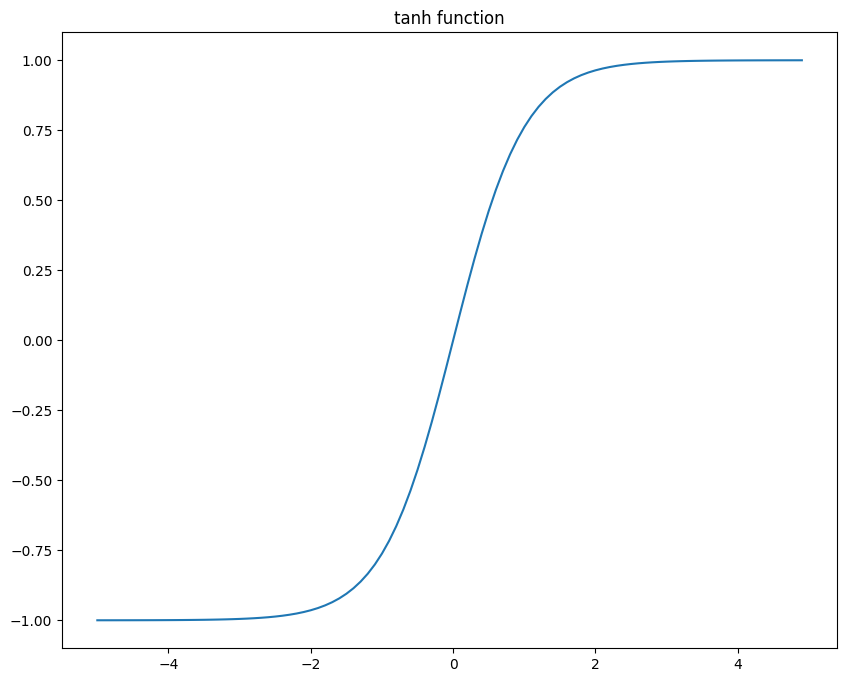

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
plt.figure(figsize=(10, 8))
plt.title('tanh function')
plt.plot(x, np.tanh(x))
plt.show()